# Working with data 2017. Class 4
## Contact
Javier Garcia-Bernardo
garcia@uva.nl

## 0. Structure
1. Stats
    - Definitions
    - What's a p-value?
    - One-tailed test vs two-tailed test
    - Count vs expected count (binomial test)
    - Independence between factors: ($\chi^2$ test)      
2. In-class exercises to melt, pivot, concat, merge, groupby and plot.
3. Read data from websited
4. Time series 

In [25]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
from scipy.stats import chi2_contingency,ttest_ind

#This allows us to use R
%load_ext rpy2.ipython

#Visualize in line
%matplotlib inline


#Be able to plot images saved in the hard drive
from IPython.display import Image,display

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## 3. Read tables from websites
pandas is cool
- Use pd.read_html(url)
- It returns a list of all tables in the website
- It tries to guess the encoding of the website, but with no much success.

In [28]:
df = pd.read_html("https://piie.com/summary-economic-sanctions-episodes-1914-2006",encoding="UTF-8")
print(type(df),len(df))
df

<class 'list'> 1


[     Year\n\t\t\timposed Year\n\t\t\tended  \
 0                   1914              1918   
 1                   1917              1918   
 2                   1918              1920   
 3                   1921              1921   
 4                   1925              1925   
 5                   1932              1935   
 6                   1932              1935   
 7                   1933              1933   
 8                   1935              1936   
 9                   1938              1947   
 10                  1939              1945   
 11                  1939              1945   
 12                  1940              1941   
 13                  1941              1945   
 14                  1941              1945   
 15                  1944              1947   
 16                  1946           Ongoing   
 17                  1948              1994   
 18                  1948              1955   
 19                  1948              1949   
 20          

In [32]:
df[0].head(10)

,Year imposed,Year ended,Principal sendera,Target country,Policy goal,Success scoreb (scale 1 to 16),Cost to target (percent of GNP)
0,1914,1918,United Kingdom,Germany,Military victory,12,7.1
1,1917,1918,United States,Japan,Shipping for Allies,4,0.8
2,1918,1920,United Kingdom,Russia,Destabilize Bolsheviks,2,4.1
3,1921,1921,League of Nations,Yugoslavia,Military disruption vs. Albania,16,–
4,1925,1925,League of Nations,Greece,Withdraw from Bulgaria,16,–
5,1932,1935,League of Nations,Paraguay,Settle the Chaco War,6,negligible
6,1932,1935,League of Nations,Bolivia,Settle the Chaco War,6,2.6
7,1933,1933,United Kingdom,USSR,Release British citizens,12,0.02
8,1935,1936,League of Nations,Italy,Withdraw from Abyssinia,2,1.7
9,1938,1947,United States,Mexico,Expropriation dispute,9,0.2


In [30]:
df[0].columns

Index(['Year\n\t\t\timposed', 'Year\n\t\t\tended', 'Principal \n\t\t\tsendera',
       'Target \n\t\t\tcountry', 'Policy \n\t\t\tgoal',
       '\nSuccess\n\t\t\tscoreb\n\t\t\t(scale \n\t\t\t1 to 16)\n',
       '\nCost\n\t\t\tto\n\t\t\ttarget\n\t\t\t(percent\n\t\t\tof GNP)\n'],
      dtype='object')

In [5]:
df = pd.read_html("https://piie.com/summary-economic-sanctions-episodes-1914-2006",encoding="UTF-8")
df = df[0]
print(df.columns)
df.columns = ['Year imposed', 'Year ended', 'Principal sender',
       'Target country', 'Policy goal',
       'Success score (scale 1 to 16)',
       'Cost to target (percent of GNP)']

df = df.replace('negligible', 0) 
df = df.replace("–","-",regex=True) #the file uses long dashes
df.to_csv("data/economic_sanctions.csv",index=None,sep="\t")

Index(['Year\n\t\t\timposed', 'Year\n\t\t\tended', 'Principal \n\t\t\tsendera',
       'Target \n\t\t\tcountry', 'Policy \n\t\t\tgoal',
       '\nSuccess\n\t\t\tscoreb\n\t\t\t(scale \n\t\t\t1 to 16)\n',
       '\nCost\n\t\t\tto\n\t\t\ttarget\n\t\t\t(percent\n\t\t\tof GNP)\n'],
      dtype='object')


In [6]:
df = pd.read_csv("data/economic_sanctions.csv",sep="\t",na_values=["-","Ongoing"])
df["Duration"] = df["Year ended"] - df["Year imposed"]
df.head()

,Year imposed,Year ended,Principal sender,Target country,Policy goal,Success score (scale 1 to 16),Cost to target (percent of GNP),Duration
0,1914,1918.0,United Kingdom,Germany,Military victory,12,7.1,4.0
1,1917,1918.0,United States,Japan,Shipping for Allies,4,0.8,1.0
2,1918,1920.0,United Kingdom,Russia,Destabilize Bolsheviks,2,4.1,2.0
3,1921,1921.0,League of Nations,Yugoslavia,Military disruption vs. Albania,16,NaN,0.0
4,1925,1925.0,League of Nations,Greece,Withdraw from Bulgaria,16,NaN,0.0


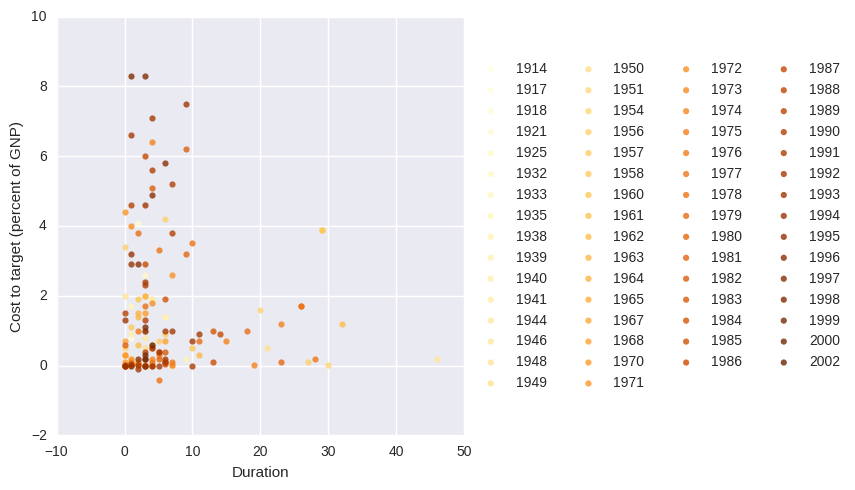

In [13]:
sns.lmplot(x="Duration",y="Cost to target (percent of GNP)",data=df,fit_reg=False,hue="Year imposed",legend=False,palette="YlOrBr")
plt.ylim((-2,10))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),ncol=4)


## 4. Parse dates
pandas is cool
- Use parse_dates=[columns] when reading the file
- It parses the date

### 4.1. Use parse_dates when reading the file

In [33]:
df = pd.read_csv("data/exchange-rate-twi-may-1970-aug-1.tsv",sep="\t",parse_dates=["Month"],skipfooter=2)
df.head()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,Month,Exchange Rate TWI. May 1970 ? Aug 1995.
0,1970-05-01,100.0
1,1970-06-01,99.6
2,1970-07-01,99.4
3,1970-08-01,99.1
4,1970-09-01,99.2


### 4.2. You can now filter by date

In [37]:
#filter by time
df_after1980 = df.loc[df["Month"] > "1980-05-02"] #year-month-date
df_after1980.columns = ["Date","Rate"]
df_after1980.head()

,Date,Rate
121,1980-06-01,85.0
122,1980-07-01,85.5
123,1980-08-01,85.8
124,1980-09-01,85.8
125,1980-10-01,86.2


### 4.3. And still extract columns of year and month

In [20]:
#make columns with year and month (useful for models)
df_after1980["Year"] = df_after1980["Date"].apply(lambda x: x.year)
df_after1980["Month"] = df_after1980["Date"].apply(lambda x: x.month)
df_after1980.head()

,Date,Rate,Year,Month
0,1970-05-01,100.0,1970,5
1,1970-06-01,99.6,1970,6
2,1970-07-01,99.4,1970,7
3,1970-08-01,99.1,1970,8
4,1970-09-01,99.2,1970,9


### 4.4. You can resample the data with a specific frequency
- Very similar to groupby.
- Groups the data with a specific frequency
    - "A" = End of year
    - "B" = Business day
    - others: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
- Then you tell pandas to apply a function to the group (mean/max/median...)


In [38]:
#resample
df_after1980_resampled = df_after1980.resample("A",on="Date").mean()
display(df_after1980_resampled.head())

,Rate
Date,
1980-12-31,86.028571
1981-12-31,91.233333
1982-12-31,86.441667
1983-12-31,79.766667
1984-12-31,81.658333


In [23]:
df_after1980_resampled = df_after1980_resampled.reset_index()
df_after1980_resampled.head()

,Date,Rate,Year,Month
0,1970-12-31,99.375000,1970.0,8.5
1,1971-12-31,99.741667,1971.0,6.5
2,1972-12-31,99.225000,1972.0,6.5
3,1973-12-31,111.208333,1973.0,6.5
4,1974-12-31,113.883333,1974.0,6.5


### 4.5 And of course plot it with a line plot

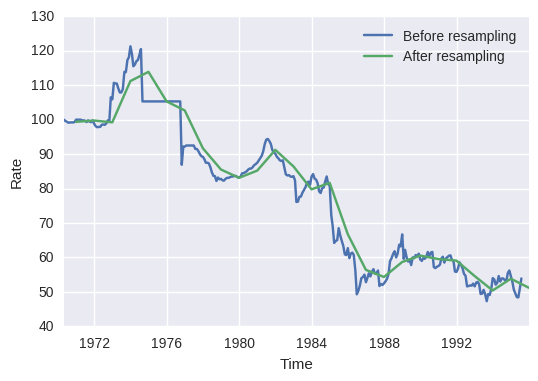

In [24]:
#Let's visualize it
plt.figure(figsize=(6,4))
plt.plot(df_after1980["Date"],df_after1980["Rate"],label="Before resampling")
plt.plot(df_after1980_resampled["Date"],df_after1980_resampled["Rate"],label="After resampling")
plt.xlabel("Time")
plt.ylabel("Rate")
plt.legend()
plt.show()